## Predicting the optimum number of clusters using KMeans clustering unsupervised learning algorithm of a given iris dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the dataset from the given csv file
df = pd.read_csv("iris.csv")
df.head()  # Reading the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(columns = "Id", inplace = True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Finding the number of samples in each category
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [7]:
x = df.iloc[ : , [0,1,2,3]].values

### Finding optimum number of clusters using the Elbow method

C:\Users\kneel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


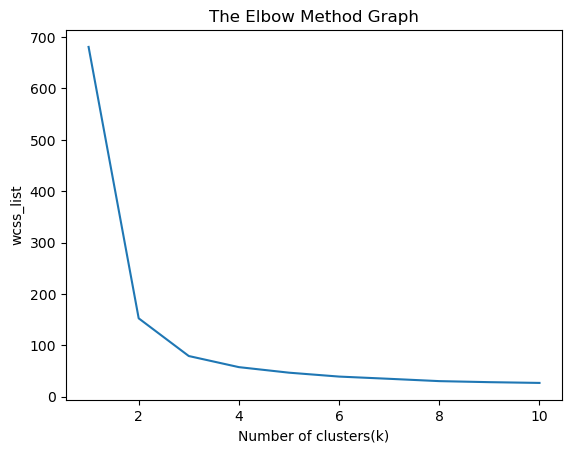

In [8]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS (Within Cluster sum of squares)
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [9]:
wcss_list

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.535582051282056,
 38.930963049671746,
 34.59897843428713,
 30.08530769230769,
 28.06327473272554,
 26.587316820410813]

In [10]:
# As there is no significant drop in the value of WCSS after K = 3. So 3 is taken as optimum number of clusters.

In [11]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

In [12]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
centroids = kmeans.cluster_centers_

In [18]:
# Reduce the data to 2 dimension using PCA (Principal component analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
centroids_pca = pca.transform(centroids)

In [21]:
# Creating a dataframe for easy plotting
iris = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])
iris['Cluster'] = y_predict
iris['Species'] = df['Species']

In [22]:
iris.head()

,PC1,PC2,Cluster,Species
0,-2.684207,0.326607,1,Iris-setosa
1,-2.715391,-0.169557,1,Iris-setosa
2,-2.889820,-0.137346,1,Iris-setosa
3,-2.746437,-0.311124,1,Iris-setosa
4,-2.728593,0.333925,1,Iris-setosa


### Visualizing the clusters

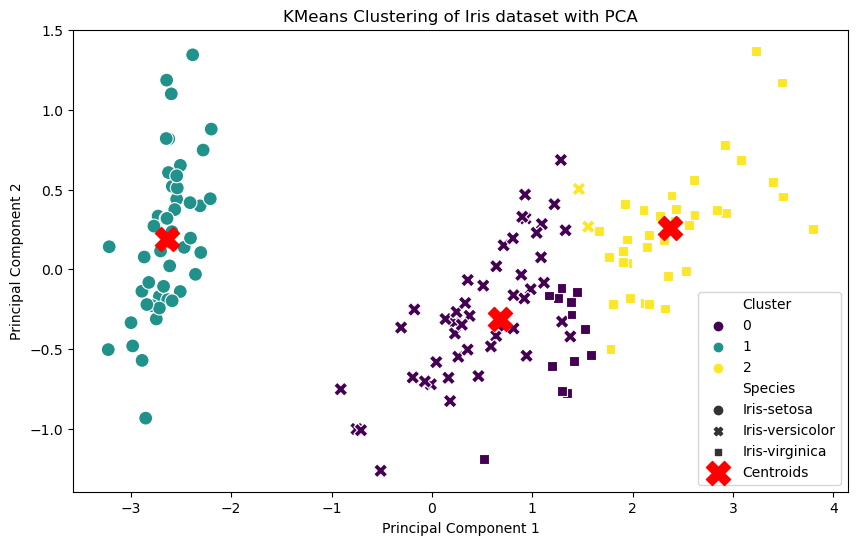

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = iris, x = 'PC1', y = 'PC2', hue = 'Cluster', palette ='viridis', style = 'Species', s = 100)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s = 300, c = 'red', label = 'Centroids', marker = 'X')

plt.title('KMeans Clustering of Iris dataset with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()